# Kings County Housing Prices Bakeoff
-- Lhamu Tsering

----

## Overview

## Data understanding

In [135]:
#Importing necessary library to load datasets
import pandas as pd

#Loading the test and working datasets
df2 = pd.read_csv('kc_house_data_test_features.csv', index_col=0)
df1 = pd.read_csv('kc_house_data_train.csv', index_col=0)

**Exploratory Data Analysis -** The initial step is to understand the data. Becoming familiar with the data is a foundational step to model building. Here, we will examine data behind the target and each of the feature variables. Relationships between the features and the target variables, as well as relationship between the feature variables will also be examined.

In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [20]:
df1.shape
# The working data set has 17290 observation or houses and 21 features

(17290, 22)

In [21]:
df2.shape
# The test data set has 4323 observation or houses and 20 features
# This set excludes the target variable which will be predict 
# after our final model is applied on the data

(4323, 20)

In [22]:
# looking at what features are present in the working data set
# Also checking for any missing values as well as the datatypes of the features
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 22 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
price_log        17290 non-null float64
dtypes: float64(6), int64(15), object(1)
m

From the data information output, it can be observed that there are no *Nan* values. All the variables are of either *int* dtype or *float* dtype. The sale `date` is the only object datatype.

In [39]:
# previewing features are present in the test data set
# Also checking for any missing values as well as the datatypes of the features
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4322
Data columns (total 20 columns):
id               4323 non-null int64
date             4323 non-null object
bedrooms         4323 non-null int64
bathrooms        4323 non-null float64
sqft_living      4323 non-null int64
sqft_lot         4323 non-null int64
floors           4323 non-null float64
waterfront       4323 non-null int64
view             4323 non-null int64
condition        4323 non-null int64
grade            4323 non-null int64
sqft_above       4323 non-null int64
sqft_basement    4323 non-null int64
yr_built         4323 non-null int64
yr_renovated     4323 non-null int64
zipcode          4323 non-null int64
lat              4323 non-null float64
long             4323 non-null float64
sqft_living15    4323 non-null int64
sqft_lot15       4323 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 709.2+ KB


In [24]:
# setting display options so that all columns are displayed
pd.set_option('display.max_columns', None)

# previewing data in the working data set
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428


In [25]:
#previewing data in the test set
df2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [26]:
# generating descriptive statistics on the working data to understand the data better
# the summary output is generated in regular format and not in scientific notation
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4565501756.436553,540739.548641,3.372470,2.111943,2081.464604,15243.399884,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824,13.048109
std,2874655595.362363,373318.978749,0.939346,0.770476,920.018539,42304.623788,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583,0.526865
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,572.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,11.225243
25%,2114700558.750000,321000.000000,3.000000,1.500000,1430.000000,5081.250000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000,12.679196
50%,3903650042.500000,450000.000000,3.000000,2.250000,1920.000000,7642.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000,13.017003
75%,7301150051.500000,645000.000000,4.000000,2.500000,2550.000000,10725.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000,13.377006
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,15.856731


From the **descriptive analysis**, we can make the following observations of the working data set, that will need to be examined further.

* **bedrooms:** the min is 0. All houses have bedrooms. This could be a case of missing value
* **bedrooms:** the max is 33. The square footage of this house will have to be looked at, to affirm this makes sense. This could also be a case of mistype.
* **bathrooms:** the min is 0. All houses have at least 1 bathroom. This could be a case of missing value.
* **floors:** The number of floors seems to be a float with .5. In [real-estate definition](https://www.gimme-shelter.com/what-is-a-1-5-storey-house-50104/#:~:text=A%20one%2Dand%2Da%2D,a%20%E2%80%9Chalf%20storey%20house%E2%80%9D.) a 1.5 storey house means that the house has a floor that only spans half the size of the main floor
* **waterfront:** the max is 1. The value is 0 at 25%, 50% and 75%. This makes sense since this variable is a dummy. Houses that have a waterfront view have a value of  1 and for no waterfront view the value is 0.
* **view:** the max is 4 but. The value is 0 at 25%, 50% and 75%. Some houses seem to have a view rating of even 0.
* **sqft_basement:** the values at the 25th and 50th percentileis 0. This could mean that only some houses have basements and others don't.
* **yr_renovated:** The value is 0 at 25%, 50% and 75%. This could mean that some house were never renovated once built.

In [27]:
# generating descriptive statistics on the test set 
df2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,4625408959.804996,3.387231,2.322056,2183.344899,12750.177423,1.738723,0.006477,0.201249,3.248439,7.904696,1936.424474,246.920426,1985.545686,64.198705,98077.777932,47.560232,-122.209611,2031.962757,10789.035855
std,2920358721.688492,0.906016,0.782063,966.768796,40639.425496,0.586193,0.080228,0.711334,0.554978,1.167461,895.247498,408.555950,30.572267,352.271856,50.974730,0.133668,0.147649,727.968964,27415.348930
min,3600072.000000,0.000000,0.000000,290.000000,635.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.185300,-122.505000,620.000000,651.000000
25%,2125734752.000000,3.000000,1.750000,1452.000000,3800.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1248.000000,0.000000,1964.000000,0.000000,98033.000000,47.487400,-122.334000,1480.000000,4000.000000
50%,3834000820.000000,3.000000,2.500000,2000.000000,6000.000000,2.000000,0.000000,0.000000,3.000000,8.000000,1690.000000,0.000000,2002.000000,0.000000,98065.000000,47.567400,-122.230000,1870.000000,6000.000000
75%,7504000830.000000,4.000000,2.500000,2730.000000,9156.000000,2.000000,0.000000,0.000000,3.000000,9.000000,2520.000000,418.500000,2009.000000,0.000000,98117.000000,47.673450,-122.115000,2460.000000,9000.000000
max,9895000040.000000,10.000000,6.500000,8020.000000,1164794.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,2810.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.364000,6210.000000,858132.000000


Similar observations can be seen in the output of descriptive summary for the test data set.

* **bedrooms:** the min is 0. This needs to be addressed
* **bathrooms:** the min is 0. This needs to be addressed

In [28]:
# looking at the number of unique values in the data for each feature
df1.nunique(axis=0)

id               17176
date               371
price             3534
bedrooms            13
bathrooms           30
sqft_living        947
sqft_lot          8428
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         867
sqft_basement      290
yr_built           116
yr_renovated        69
zipcode             70
lat               4837
long               733
sqft_living15      714
sqft_lot15        7582
price_log         3534
dtype: int64

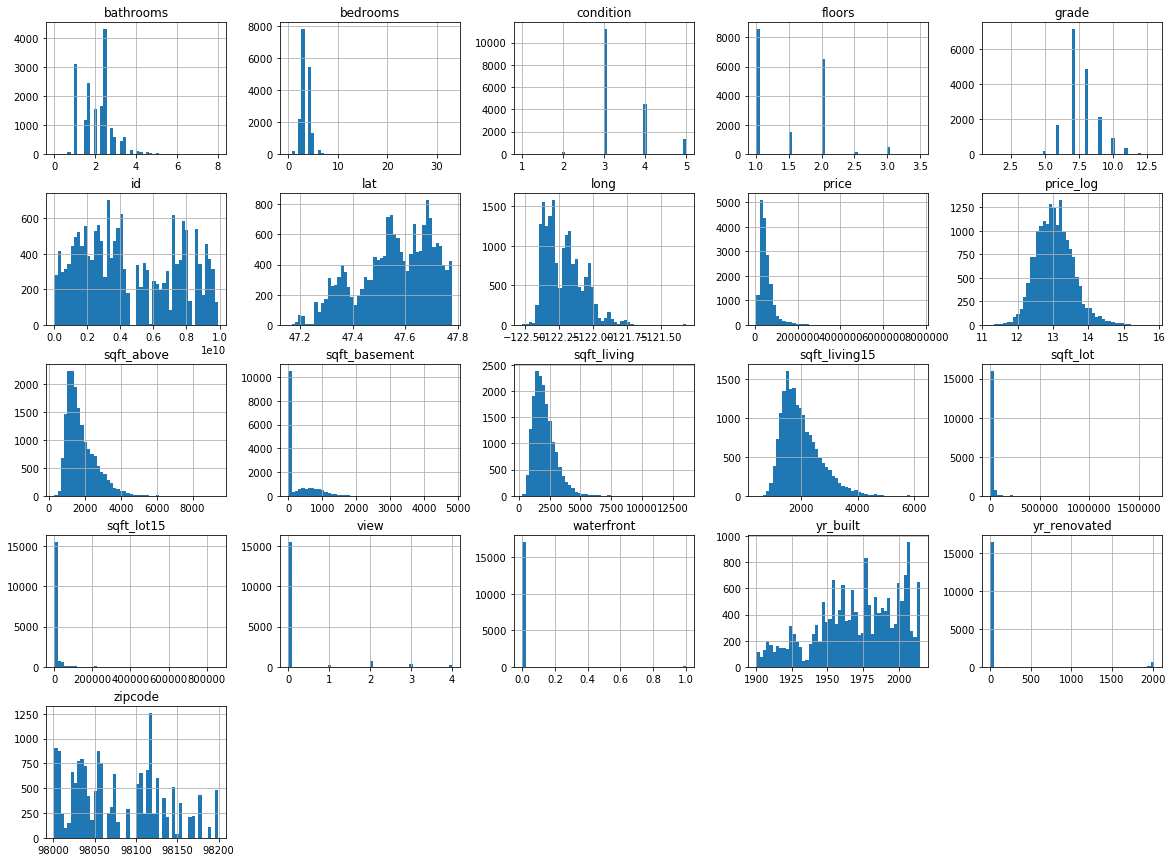

In [29]:
# examining the distribution of data for each of the features and target
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
# examining the measure of the degree of correlation between all variables
df1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605,-0.002317
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,0.886244
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665,0.343370
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499,0.551547
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570,0.696895
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875,0.097651
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170,0.312198
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895,0.183123
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185,0.346461
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125,0.040469


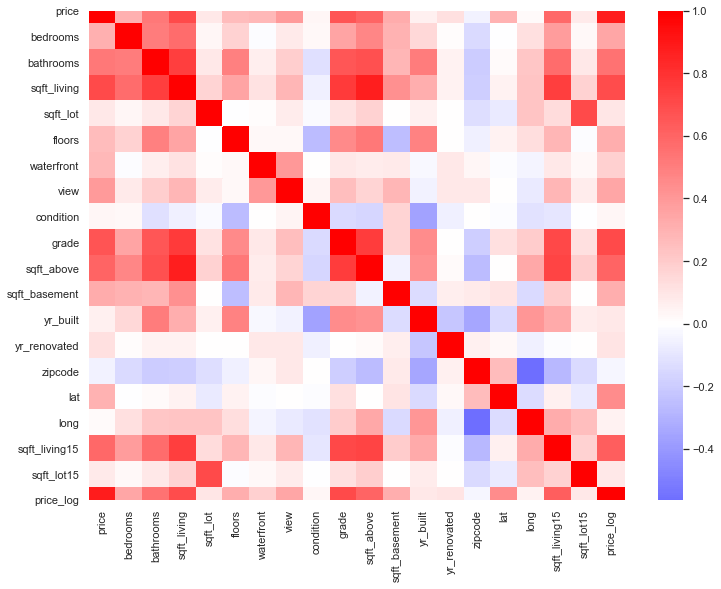

In [31]:
# generating a visual preview of correlation information between all variables
corr = df1.drop(columns = ['id']).corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr, xticklabels=corr.columns, \
            yticklabels=corr.columns, \
            annot=False, cmap='bwr', center= 0)

In [137]:
#defining the target variable for modeling
target = df1['price']

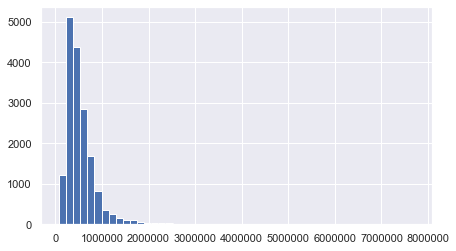

In [33]:
# examining the target variable data distribution
fig, ax = plt.subplots(figsize = (7,4))
ax.hist(df1['price'], bins = 50);

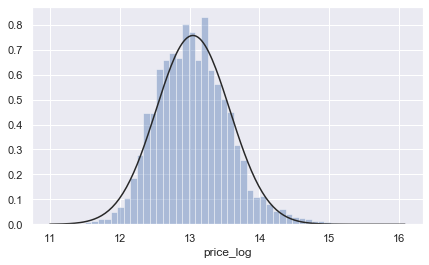

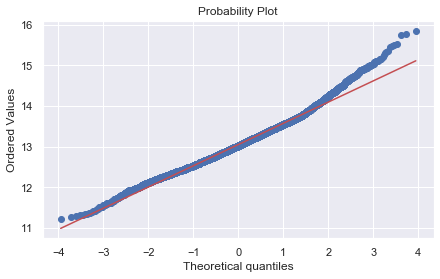

In [138]:
# log transformation of target
df1['price_log'] = np.log(df1['price'])
target_log = df1['price_log']

# transformed target histogram and normal probability plot
from scipy import stats
from scipy.stats import norm
fig = plt.figure(figsize = (7,4))
sns.distplot(target_log, fit=norm,  bins=50, kde=False);
fig = plt.figure(figsize = (7,4))
res = stats.probplot(df1['price_log'], plot=plt)

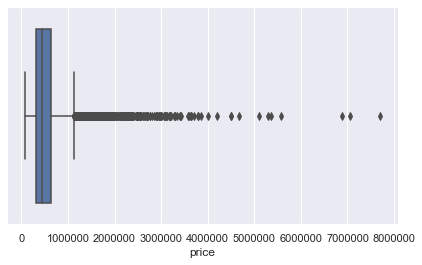

In [20]:
fig = plt.figure(figsize = (7,4))
sns.boxplot(target)
# do more here to build visualization.
#need to understand the outlier situation

In [6]:
df1['floors'].value_counts()
# Binning here rounding up the values?

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

In [7]:
df1['waterfront'].value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [8]:
df1['view'].value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [9]:
df1['condition'].value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [10]:
df1['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [106]:
#examining VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df1.dropna()

df_vif = df1._get_numeric_data() #to get only the numeric columns

predictors= df_vif.drop(columns=['id', "sqft_lot",'sqft_living', 'sqft_above', 'sqft_basement', "sqft_lot15", "yr_built", "yr_renovated"])

vif = pd.DataFrame()
vif['VIF'] = [format(variance_inflation_factor(predictors.values, i), '.2f') for i in range(predictors.shape[1])]
vif["features"] = predictors.columns

vif


,VIF,features
0,8.16,price
1,19.63,bedrooms
2,20.89,bathrooms
3,13.01,floors
4,1.28,waterfront
5,1.52,view
6,31.84,condition
7,139.10,grade
8,1409575.94,zipcode
9,149717.15,lat


**Data Cleaning -** Before model building, any issues identified during the exploratory data analysis process should be resolved.

In [139]:
# checking the number of observations affected with the issue
df1.loc[(df1['bathrooms'] == 0) | (df1['bedrooms'] == 0)].shape

(14, 22)

There are 14 rows of observations where the `bathrooms`  or `bedrooms` is 0. The information of the house for these features seem to be missing. Since, removing them is not a viable option as the test set also contains similar issues, we will examine the distribution and impute the mean to that zero value.

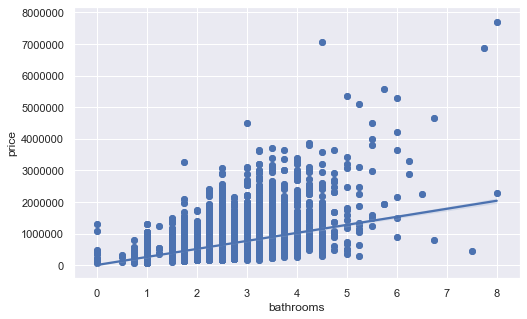

In [140]:
x1 = df1['bathrooms']
y1 = df1['price']
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(x1, y1);
sns.regplot(x1, y1);

In [141]:
# imputing mean to the zero values in the working and test data
df1.loc[df1['bathrooms']== 0, 'bathrooms'] = df1['bathrooms'].mean()
df2.loc[df2['bathrooms']== 0, 'bathrooms'] = df2['bathrooms'].mean()

In [142]:
# confirming no zero values
df1.loc[df1['bathrooms']==0].shape

(0, 22)

In [143]:
# confirming no zero values
df2.loc[df2['bathrooms']==0].shape

(0, 20)

In [144]:
# descriptive informaiton on updated feature data for working set
df1['bathrooms'].describe()

count    17290.000000
mean         2.112921
std          0.769135
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [33]:
# descriptive informaiton on updated feature data for test set
df2['bathrooms'].describe()

count    4323.000000
mean        2.322594
std         0.781264
min         0.750000
25%         1.750000
50%         2.500000
75%         2.500000
max         6.500000
Name: bathrooms, dtype: float64

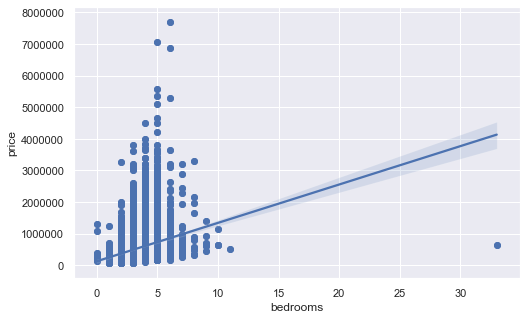

In [35]:
x1 = df1['bedrooms']
y1 = df1['price']
fig, ax = plt.subplots( figsize = (8,5))
ax.scatter(x1, y1);
sns.regplot(x1, y1);
# ax2.hist(x1, y1)

In [145]:
# imputing mean to the zero values in the working and test data
df1.loc[df1['bedrooms']== 0, 'bedrooms'] = df1['bedrooms'].mean()
df2.loc[df2['bedrooms']== 0, 'bedrooms'] = df2['bedrooms'].mean()

# confirming no zero values in working data
df1.loc[df1['bedrooms']==0].shape

(0, 22)

In [146]:
# confirming no zero values in test data
df2.loc[df2['bedrooms']==0].shape

(0, 20)

In [41]:
# descriptive information on updated feature data
df1['bedrooms'].describe()

count    17290.000000
mean         3.374810
std          0.935131
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [42]:
#descriptive information on updated feature data
df2['bedrooms'].describe()

count    4323.000000
mean        3.388798
std         0.903079
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedrooms, dtype: float64

In [44]:
# Examining the observation with 33 bedrooms
df1[df1['bedrooms']== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
8597,2402100895,20140625T000000,640000.0,33.0,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,13.369223


In [45]:
# previewing observations with 3 bedrooms to compare
df1[df1['bedrooms']== 3].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
3,9522300010,20150331T000000,1490000.0,3.0,3.5,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287
4,9510861140,20140714T000000,711000.0,3.0,2.5,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428
7,7010701383,20141017T000000,680000.0,3.0,2.5,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400,13.429848
8,291310170,20140804T000000,384500.0,3.0,2.5,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288,12.859699
10,6840701125,20150422T000000,638000.0,3.0,1.0,1830,4400,1.5,0,0,4,8,1720,110,1930,0,98122,47.6052,-122.300,1650,4400,13.366094


In comparing data on the square footage of the houses with 3 bedrooms versus the house with 33 bedrooms, it can be seen that the house with 33 bedrooms in not very large in size. Infact a similar house with 1600sqft of `sqft_living` has 3 bedrooms. Based on this and the assumption that 33 bedrooms is a typo, I updated the value as 3 bedrooms for that house.

In [147]:
# Updating mistyped data
df1.loc[df1['bedrooms']==33, 'bedrooms'] = 3

In [148]:
# Isolating the date information in the string dtype date
df1['date'] = df1['date'].apply(lambda x: (x[:8]))

# converting date to float and then date format
df1['date'].astype(float)
df1['date2']= pd.to_datetime(df1['date'], format='%Y/%m/%d')

**Generating new features -** From the correlation coefficients of the features, I noticed that there was weak to moderate multicollinearity present in the working data set. There could be some features that can be generated through transformations or interactions that might help explain the target better and remove or reduce any collinearity issues. Following are some possible interaction features that could be important

1. bathroom/bedroom --- Number of bathrooms per bedroom **0.2784**
2. bathroom/ floor --- Number of bathrooms per floor corr to price is **0.2402**
3. bathroom/ sqft-living --- Number of bathrooms per sqft of living space in house -0.2655. Does this make sense? I think not
4. age --- Age of the house in 2020 based on yr-built --- corr to price is -0.05645. Not very correlated with price
5. sqft_living/sqft_above: Proportion of living or usable space available --- 0.1093
6. (sqft_above + sqft_basement)/ floor : avg sqft per floor --- **0.4334**
7. sqft_lot - sqft/floor -- square foot size of available outside open space --- 0.08
8. sqft_living - sqft_above -- square foot size of other possible spaces under the roof (like garage etc) --- **0.3233**

In [149]:
# generating new feature 1
df1['bath_per_bed'] = df1['bathrooms']/ df1['bedrooms']
df1['bath_per_bed'].corr(df1['price'])

# generating new feature 2
df1['bath_per_flr'] = df1['bathrooms']/ df1['floors']
df1['bath_per_flr'].corr(df1['price'])

# generating new feature 3
df1['bath_per_sqftliv'] = df1['bathrooms'] / df1['sqft_living']
df1['bath_per_sqftliv'].corr(df1['price'])

# generating new feature 4
df1['age'] = 2020 - df1['yr_built']
df1['age'].corr(df1['price'])

# generating new feature 5
df1['use_prop'] = df1['sqft_living']/ df1['sqft_above']
df1['use_prop'].corr(df1['price'])

# generating new feature 6
df1['sqft_per_flr'] = (df1['sqft_above'] + df1['sqft_basement'])/df1['floors']
df1['sqft_per_flr'].corr(df1['price'])

# generating new feature 7
df1['outside_space'] = df1['sqft_lot'] - df1['sqft_per_flr']
df1['outside_space'].corr(df1['price'])

# generating new feature 8
df1['other_space'] = df1['sqft_living'] - df1['sqft_above']
df1['other_space'].corr(df1['price'])
# this could also be a dummya

0.32331176808688505

The observed correlation for the new features to price is below 
1. `bath_per_bed` to `price`  --- **0.2784**
2. `bath_per_flr` to `price` --- **0.2402**
3. `bath_per_sqftliv` to `price` --- -0.2655. This intuitively does not make sense.
4. `age` to `price` --- -0.05645
5. `use_prop` to `price` --- 0.1093
6.`sqft_per_flr` to `price` --- **0.4334**
7. `outside_space` to `price` --- 0.08
8. `other_space` to `price` --- **0.3233**

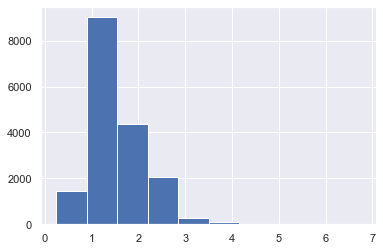

In [52]:
x1 = df1['bath_per_flr']
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(x1);

In [53]:
df1['bath_per_flr'].describe()

count    17290.000000
mean         1.505232
std          0.573514
min          0.250000
25%          1.000000
50%          1.250000
75%          1.750000
max          6.750000
Name: bath_per_flr, dtype: float64

Some more new feature tests- on the following variables
1. condition - binning house condition to three categories
2. grade - binning grade to three categories
3. sqft_basement -  only some house have sqfootage meaning only those houses have a basement. Dummy for have or not have a basement
4. yr_renovated - only some houses have renovation year, meaning only those houses have upgrades or renovation done. Dummy for have or not have renovation.
5. The quarter of the year the house was sold in
6. The month of the year the house was sold in

In [150]:
# generating new basement feature with 1 for has basement and 0 for not
df1['basement'] = df1['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,date2,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_flr,outside_space,other_space,basement
0,2591820310,20141006,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,2014-10-06,0.562500,1.125,0.001087,34,1.000000,1035.0,7858.0,0,0
1,7974200820,20140821,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,2014-08-21,0.600000,3.000,0.001034,43,1.584699,2900.0,3830.0,1070,1
2,7701450110,20140815,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,2014-08-15,0.625000,1.250,0.000663,23,1.000000,1885.0,9008.0,0,0
3,9522300010,20150331,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,2015-03-31,1.166667,1.750,0.000768,30,1.000000,2280.0,12328.0,0,0
4,9510861140,20140714,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,2014-07-14,0.833333,1.250,0.000980,16,1.000000,1275.0,4101.0,0,0


In [49]:
# checking correlation with target
df1['basement'].corr(df1['price'])

0.17697029253082677

In [51]:
#previewing data in yr_renovated feature
df1['yr_renovated'].value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [151]:
# generating new renovated feature with 1 for has renovation and 0 for not
df1['renovated'] = df1['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,date2,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_flr,outside_space,other_space,basement,renovated
0,2591820310,20141006,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,2014-10-06,0.562500,1.125,0.001087,34,1.000000,1035.0,7858.0,0,0,0
1,7974200820,20140821,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,2014-08-21,0.600000,3.000,0.001034,43,1.584699,2900.0,3830.0,1070,1,0
2,7701450110,20140815,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,2014-08-15,0.625000,1.250,0.000663,23,1.000000,1885.0,9008.0,0,0,0
3,9522300010,20150331,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,2015-03-31,1.166667,1.750,0.000768,30,1.000000,2280.0,12328.0,0,0,0
4,9510861140,20140714,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,2014-07-14,0.833333,1.250,0.000980,16,1.000000,1275.0,4101.0,0,0,0


In [53]:
# checking relationship strength with target
df1['renovated'].corr(df1['price'])

0.11740867717359796

In [50]:
# previewing data proportions in grade feature
df1['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [152]:
# binning the grade data to 3 levels of quality in a new feature design_grade
conditions = [
    df1['grade'] <= 4,
    df1['grade'] >= 10
]

choices = [
    'low_quality',
    'high_quality'
]
df1['design_grade'] = np.select(conditions, choices, default = 'ave_quality')

df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,date2,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_flr,outside_space,other_space,basement,renovated,design_grade
0,2591820310,20141006,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,2014-10-06,0.562500,1.125,0.001087,34,1.000000,1035.0,7858.0,0,0,0,ave_quality
1,7974200820,20140821,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,2014-08-21,0.600000,3.000,0.001034,43,1.584699,2900.0,3830.0,1070,1,0,ave_quality
2,7701450110,20140815,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,2014-08-15,0.625000,1.250,0.000663,23,1.000000,1885.0,9008.0,0,0,0,high_quality
3,9522300010,20150331,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,2015-03-31,1.166667,1.750,0.000768,30,1.000000,2280.0,12328.0,0,0,0,high_quality
4,9510861140,20140714,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,2014-07-14,0.833333,1.250,0.000980,16,1.000000,1275.0,4101.0,0,0,0,ave_quality


In [56]:
# generating dummy variable on the design_grade variable
df1['design_grade'].value_counts()

ave_quality     15970
high_quality     1295
low_quality        25
Name: design_grade, dtype: int64

Majority of houses are of average design quality with `grade` between 5 to 9. 

In [153]:
#generating dummy variables on the design_grade feature
dummy1 = pd.get_dummies(df1['design_grade'])
# dummy1['price'] = df1['price']
# dummy1['grade'] = df1['grade']
dummy1.corr()

,ave_quality,high_quality,low_quality
ave_quality,1.000000,-0.989711,-0.132359
high_quality,-0.989711,1.000000,-0.010828
low_quality,-0.132359,-0.010828,1.000000


In [ ]:
dummy1.describe()

In [57]:
# checking the proportion of data at each quality level 
df1['condition'].value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [154]:
# binning the condition data to 3 levels of house condition in a new feature status
conditions = [
    df1['condition'] == 1,
    df1['grade'] >= 4
]

choices = [
    'low',
    'high'
]
df1['status'] = np.select(conditions, choices, default = 'ave')

df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,date2,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_flr,outside_space,other_space,basement,renovated,design_grade,status
0,2591820310,20141006,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,2014-10-06,0.562500,1.125,0.001087,34,1.000000,1035.0,7858.0,0,0,0,ave_quality,high
1,7974200820,20140821,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,2014-08-21,0.600000,3.000,0.001034,43,1.584699,2900.0,3830.0,1070,1,0,ave_quality,high
2,7701450110,20140815,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,2014-08-15,0.625000,1.250,0.000663,23,1.000000,1885.0,9008.0,0,0,0,high_quality,high
3,9522300010,20150331,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,2015-03-31,1.166667,1.750,0.000768,30,1.000000,2280.0,12328.0,0,0,0,high_quality,high
4,9510861140,20140714,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,2014-07-14,0.833333,1.250,0.000980,16,1.000000,1275.0,4101.0,0,0,0,ave_quality,high


In [60]:
df1['status'].value_counts()

high    17264
low        24
ave         2
Name: status, dtype: int64

Majority of the houses are in excellent status with condition ratings of 4 or 5. 

In [155]:
#generating dummy variables on the status feature
dummy2 = pd.get_dummies(df1['status'])
# dummy2['price'] = df1['price']
# dummy2['condition'] = df1['condition']
dummy2.corr()

,ave,high,low
ave,1.000000,-0.277158,-0.000401
high,-0.277158,1.000000,-0.960713
low,-0.000401,-0.960713,1.000000


In [156]:
# new features from date
# The quarter of the year the house was sold
df1['sale_quarter'] = df1['date2'].dt.quarter

# The month the house was sold
df1['sale_month'] = df1['date2'].dt.month

In [157]:
df1 = pd.concat([df1, dummy1, dummy2], 1)
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,date2,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_flr,outside_space,other_space,basement,renovated,design_grade,status,sale_quarter,sale_month,ave_quality,high_quality,low_quality,ave,high,low
0,2591820310,20141006,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,2014-10-06,0.562500,1.125,0.001087,34,1.000000,1035.0,7858.0,0,0,0,ave_quality,high,4,10,1,0,0,0,1,0
1,7974200820,20140821,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,2014-08-21,0.600000,3.000,0.001034,43,1.584699,2900.0,3830.0,1070,1,0,ave_quality,high,3,8,1,0,0,0,1,0
2,7701450110,20140815,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,2014-08-15,0.625000,1.250,0.000663,23,1.000000,1885.0,9008.0,0,0,0,high_quality,high,3,8,0,1,0,0,1,0
3,9522300010,20150331,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,2015-03-31,1.166667,1.750,0.000768,30,1.000000,2280.0,12328.0,0,0,0,high_quality,high,1,3,0,1,0,0,1,0
4,9510861140,20140714,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,2014-07-14,0.833333,1.250,0.000980,16,1.000000,1275.0,4101.0,0,0,0,ave_quality,high,3,7,1,0,0,0,1,0


In [98]:
new_features = ['price', 'price_log', 'date2',
       'bath_per_bed', 'bath_per_flr', 'bath_per_sqftliv', 'age', 'use_prop',
       'sqft_per_flr', 'outside_space', 'other_space', 'basement', 'renovated',
       'design_grade', 'status', 'ave_quality', 'high_quality', 'low_quality',
       'ave', 'high', 'low']
df_new_features = df1[new_features]
df_new_features.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,price,price_log,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_flr,outside_space,other_space,basement,renovated,ave_quality,high_quality,low_quality,ave,high,low
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,540739.548641,13.048109,0.639932,1.504606,0.001075,49.207981,1.200177,1489.659742,13753.740143,292.158589,0.393638,0.041990,0.923655,0.074899,0.001446,0.000116,0.998496,0.001388
std,373318.978749,0.526865,0.213022,0.574267,0.000316,29.343516,0.298263,655.485856,42217.461371,443.151874,0.488570,0.200571,0.265557,0.263236,0.037999,0.010755,0.038750,0.037232
min,75000.000000,11.225243,0.000000,0.000000,0.000000,5.000000,1.000000,253.333333,-151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,321000.000000,12.679196,0.500000,1.000000,0.000855,24.000000,1.000000,1030.000000,3805.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,450000.000000,13.017003,0.625000,1.250000,0.001029,46.000000,1.000000,1373.333333,6157.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,645000.000000,13.377006,0.750000,1.750000,0.001246,69.000000,1.379254,1824.750000,9096.000000,560.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7700000.000000,15.856731,2.500000,6.750000,0.003767,120.000000,3.000000,9640.000000,1650059.000000,4820.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 `outside_space` has a negative minimum value. There may be houses that do not have an outside open space. Also the new feature `other_space` has the same descriptive statistics as sqft_basement. This new feature will have to be omitted.

In [158]:
import warnings
warnings.filterwarnings("ignore")
df1.loc[df1['outside_space'] <=0, 'outside_space'] = 0

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
# here instantiating an object

In [ ]:
poly_data = poly.fit_transform(df_features)

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [159]:
features = list(df1.columns)
features.remove('price')
features.remove('price_log')
# features.remove('date')
features.remove('status')
features.remove('design_grade')
# features.remove('date2')
# len(features)

In [160]:
df_features1 = df1[features]
df_features1.dtypes

id                           int64
date                        object
bedrooms                   float64
bathrooms                  float64
sqft_living                  int64
sqft_lot                     int64
floors                     float64
waterfront                   int64
view                         int64
condition                    int64
grade                        int64
sqft_above                   int64
sqft_basement                int64
yr_built                     int64
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                       float64
sqft_living15                int64
sqft_lot15                   int64
date2               datetime64[ns]
bath_per_bed               float64
bath_per_flr               float64
bath_per_sqftliv           float64
age                          int64
use_prop                   float64
sqft_per_flr               float64
outside_space              float64
other_space         

**Reword this section!!!!!!!!!!!!** A baseline model is a model with NO predictors. In regression essentially it is the mean ( or median) of the y-variable. We can create a baseline model in sklearn using the DummyRegressor object.

In [161]:
X_train = df_features1
y_train = target
y_train_log = target_log

In [162]:
# Baseline model
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor()  # by default this will use the mean

baseline.fit(X_train, y_train)

baseline.score(X_train, y_train) 


0.0

In [163]:
y_pred_bs = baseline.predict(X_train) 

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


baseline_mae = mean_absolute_error(y_train, y_pred_bs)
baseline_rmse = mean_squared_error(y_train, y_pred_bs, squared = False)

print('Mean Absolute Error:', baseline_mae )
print('Root Mean Squared Error:' , baseline_rmse)

Mean Absolute Error: 234669.23521371387
Root Mean Squared Error: 373308.18278696557


In [165]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_features1, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train1.shape, "Target: ", y_train1.shape,)
print("Test set - Features: ", X_test1.shape, "Target: ",y_test1.shape,)

Training set - Features:  (13832, 39) Target:  (13832,)
Test set - Features:  (3458, 39) Target:  (3458,)


In [166]:
baseline_log = DummyRegressor()  # by default this will use the mean

baseline_log.fit(X_train, y_train_log)

baseline_log.score(X_train, y_train_log)

0.0

In [178]:
y_pred_bs_log = baseline_log.predict(X_train)
y_pred_bs_log = np.exp(y_pred_bs_log)

baseline_log_mae = mean_absolute_error(y_train, y_pred_bs_log)
baseline_log_rmse = mean_squared_error(y_train, y_pred_bs_log, squared = False)

print('Mean Absolute Error:', baseline_log_mae )
print('Root Mean Squared Error:' , baseline_log_rmse)

Mean Absolute Error: 222780.93848159592
Root Mean Squared Error: 381070.307102563


In [180]:
print('Original: ', int(baseline_rmse), "vs. Logged: ", int(baseline_log_rmse))

Original:  373308 vs. Logged:  381070


### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
model1 = linear_model.LinearRegression()

#fit the linear regression to the data
model1.fit(X_train1, y_train1)


print(lm.intercept_)
print(lm.coef_)

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/